In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [66]:
import pandas as pd

def load_data(folder_path):
    # Đọc câu nói từ file sentences.txt
    with open(folder_path+'sents.txt', 'r', encoding='utf-8') as file:
        sentences = [line.strip() for line in file]

    # Đọc nhãn từ file labels.txt
    with open(folder_path+'sentiments.txt', 'r', encoding='utf-8') as file:
        labels = [int(line.strip()) for line in file]

    # Kiểm tra độ dài của dữ liệu
    assert len(sentences) == len(labels), "Số lượng câu nói và nhãn không khớp"

    # Tạo DataFrame
    df = pd.DataFrame({'text': sentences, 'label': labels})
    return df

train = load_data('data/train/')
test = load_data('data/test/')
print(train)

                                                    text  label
0                              slide giáo trình đầy đủ .      2
1         nhiệt tình giảng dạy , gần gũi với sinh viên .      2
2                   đi học đầy đủ full điểm chuyên cần .      0
3      chưa áp dụng công nghệ thông tin và các thiết ...      0
4      thầy giảng bài hay , có nhiều bài tập ví dụ ng...      2
...                                                  ...    ...
11421  chỉ vì môn game mà em học hai lần mà không qua...      0
11422                               em cảm ơn cô nhiều .      2
11423                           giao bài tập quá nhiều .      0
11424               giáo viên dạy dễ hiểu , nhiệt tình .      2
11425  gói gọn doubledot hay , tận tình , phù hợp với...      2

[11426 rows x 2 columns]


In [67]:
X_train = train['text']
y_train = train['label']
X_test = test['text']
y_test = test['label']

In [68]:
accuracys = []
precisions = []
recalls = []
f1s = []

## Bài 1: Sử dụng phương pháp Counting Vectorizer

In [69]:
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)


In [70]:
models = [
    ("Naive Bayes", MultinomialNB()),
    ("SVM", SVC()),
    ("Softmax Regression", LogisticRegression(multi_class='multinomial'))
]

for name, model in models:
    model.fit(X_train_counts, y_train)
    y_pred = model.predict(X_test_counts)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    accuracys.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    
    print(f"{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

Naive Bayes:
Accuracy: 0.8402
Precision: 0.8273
Recall: 0.8402
F1 Score: 0.8266
SVM:
Accuracy: 0.8860
Precision: 0.8770
Recall: 0.8860
F1 Score: 0.8660
Softmax Regression:
Accuracy: 0.8841
Precision: 0.8723
Recall: 0.8841
F1 Score: 0.8752


c:\Users\Kaisaac\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Bài 2: Sử dụng phương pháp TF-IDF Vectorizer

In [71]:
vectorizer = TfidfVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)


In [72]:
models = [
    ("Naive Bayes", MultinomialNB()),
    ("SVM", SVC()),
    ("Softmax Regression", LogisticRegression(multi_class='multinomial'))
]

for name, model in models:
    model.fit(X_train_counts, y_train)
    y_pred = model.predict(X_test_counts)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    accuracys.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    
    print(f"{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

Naive Bayes:
Accuracy: 0.8402
Precision: 0.8013
Recall: 0.8402
F1 Score: 0.8180


SVM:
Accuracy: 0.8898
Precision: 0.8904
Recall: 0.8898
F1 Score: 0.8730
Softmax Regression:
Accuracy: 0.8809
Precision: 0.8704
Recall: 0.8809
F1 Score: 0.8639


## Bài 3: Sử dụng VnCoreNLP tách từ, TF-IDF để mã hóa

In [73]:
from vncorenlp import VnCoreNLP

rdrsegmenter = VnCoreNLP("VnCoreNLP-1.2.jar", annotators="wseg", max_heap_size='-Xmx2g')

def word_segment(text):
    output = []
    for sentence in text:
        output.append(' '.join(rdrsegmenter.tokenize(sentence)[0]))
    return output

X_train = word_segment(X_train)
X_test = word_segment(X_test)
print(X_train[:5])

ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=64095): Max retries exceeded with url: /annotators (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000216B34D9390>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

In [ ]:
vectorizer = TfidfVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)
# X_train_counts[0].toarray()

In [ ]:
models = [
    ("Naive Bayes", MultinomialNB()),
    ("SVM", SVC()),
    ("Softmax Regression", LogisticRegression(multi_class='multinomial'))
]

for name, model in models:
    model.fit(X_train_counts, y_train)
    y_pred = model.predict(X_test_counts)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    accuracys.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    
    print(f"{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

Naive Bayes:
Accuracy: 0.8506
Precision: 0.8098
Recall: 0.8506
F1 Score: 0.8279


c:\Users\Kaisaac\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM:
Accuracy: 0.8942
Precision: 0.8916
Recall: 0.8942
F1 Score: 0.8766
Softmax Regression:
Accuracy: 0.8857
Precision: 0.8758
Recall: 0.8857
F1 Score: 0.8671


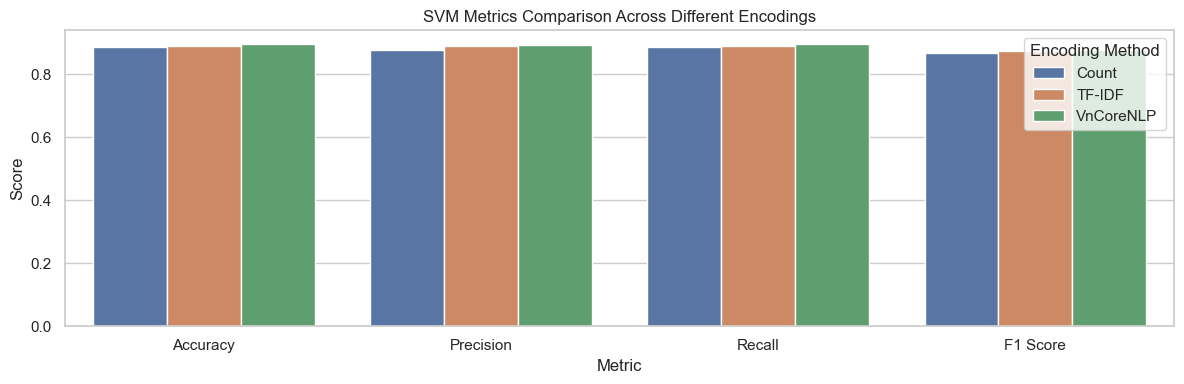

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Kết quả của các phương pháp mã hóa
results = {
    'Method': ['Naive Bayes', 'SVM', 'Softmax Regression',
               'Naive Bayes', 'SVM', 'Softmax Regression',
               'Naive Bayes', 'SVM', 'Softmax Regression'],
    'Encoding': ['Count', 'Count', 'Count',
                 'TF-IDF', 'TF-IDF', 'TF-IDF',
                 'VnCoreNLP', 'VnCoreNLP', 'VnCoreNLP'],
    'Accuracy': accuracys,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1s
}

# Tạo DataFrame từ kết quả
df = pd.DataFrame(results)

# Lọc DataFrame để chỉ giữ lại các hàng có 'Method' là 'SVM'
df_svm = df[df['Method'] == 'SVM']

# Chuyển đổi DataFrame để thuận tiện cho việc vẽ biểu đồ
df_svm_melted = df_svm.melt(id_vars=['Encoding'], value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score'], 
                            var_name='Metric', value_name='Score')

# Thiết lập kiểu hiển thị của seaborn
sns.set(style="whitegrid")

# Tạo biểu đồ
plt.figure(figsize=(12, 4))
sns.barplot(x='Metric', y='Score', hue='Encoding', data=df_svm_melted)

# Thiết lập tiêu đề và nhãn
plt.title('SVM Metrics Comparison Across Different Encodings')
plt.ylabel('Score')
plt.xlabel('Metric')

# Hiển thị chú thích
plt.legend(title='Encoding Method')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


**Nhận xét**: 
Việc tách từ có thể cải thiện hiệu suất của mô hình SVM trong bài toán phân tích cảm xúc này, lý do là tiếng Việt là một ngôn ngữ đơn âm tiết, có hệ thống từ đơn từ ghép, việc xử lý thêm các dấu gạch nối vào các từ ghép sẽ giúp cho mô hình hiểu về ngữ nghĩa của tiếng Việt tốt hơn. 

VD: chữ "sinh" trong: "Học_sinh học sinh_học", "sinh" trong "sinh_học" có nghĩa là sinh vật, còn chữ "sinh" trong "học_sinh" chỉ người. Nếu tách từ thông thường thì nghĩa của 2 từ "sinh" bên trên sẽ bị nhầm lẫn. 

Khi không tách từ, mô hình có thể gặp khó khăn trong việc nhận diện các từ và mẫu từ, do đó các đặc trưng đầu vào sẽ không đầy đủ hoặc không chính xác. Khi tách từ, các từ trong câu được nhận diện rõ ràng hơn, giúp mô hình xây dựng các đặc trưng chính xác và phân loại tốt hơn. Điều này dẫn đến các độ đo như accuracy, precision, recall và F1 score cao hơn so với khi không tách từ. 

Dựa vào biểu đồ, ta nhận thấy các chỉ số Accurancy, Precision, Recall, F1 đều có xu hướng giống nhau. 

* Accurancy: đối với mô hình SVM thì tiền xử lý bằng phường pháp counting cho kết quả thấp nhất, sau đó đến tf-idf, cao nhất là tf-idf kết hợp với việc tách từ bằng VNCoreNLP, tuy nhiên sự chênh lệch là có nhưng không quá lớn. Sỡ dĩ khi áp dụng tf-idf vectorizer mô hình cho kết quả tốt hơn một chút đối với phương pháp counting vectorizer là vì nó có cơ chế tf-idf là nhũng từ xuất hiện nhiều trong 1 văn bản này và xuất hiện ít trong văn bản khác. Việc này giúp lọc ra những từ phổ biến và giữ lại những từ có giá trị cao trong văn bản (keyword). Còn lý do khi áp dụng thêm VNCoreNLP giúp mô hình tốt hơn đã được đề cập bên trên. 

* Precision, Recall, F1-score: cũng tương tự như accurancy, thứ tự từ tốt đến tốt hơn của các phương pháp vectorizer lần lượt là counting vectorizer, tf-idf vectorizer, tf-idf vectorizer kết hợp tách từ bằng VNCoreNLP. 

## Bài 4: Áp dụng thêm một số kĩ thuật tiền xử lý (remove stopword)

Sau khi tham khảo một số phương pháp và đọc qua bộ dữ liệu, em nhận thấy đây là một bộ dữ liệu tương đối sạch, không có teencode, emoji hay những từ được viết nhấn mạnh (kiddcosooooooo -> có), do đó phương pháp em chọn để thử nghiệm preprocessing thêm là `Remove Stopwords` trên bộ dữ liệu đã được tách từ sẵn bằng VNCoreNLP và sau đó vectorizer bằng phương pháp TF-IDF. 

In [ ]:
sw_path = 'vietnamese-stopwords-dash.txt'

with open(sw_path, 'r', encoding='utf-8') as file:
    stopwords = file.readlines()
stopwords = [word.strip() for word in stopwords]

stopwords[:5]

['a_lô', 'a_ha', 'ai', 'ai_ai', 'ai_nấy']

In [ ]:
X_train[:10]

['slide giáo_trình đầy_đủ .',
 'nhiệt_tình giảng_dạy , gần_gũi với sinh_viên .',
 'đi học đầy_đủ full điểm chuyên_cần .',
 'chưa áp_dụng công_nghệ_thông_tin và các thiết_bị hỗ_trợ cho việc giảng_dạy .',
 'thầy giảng bài hay , có nhiều bài_tập ví_dụ ngay trên lớp .',
 'giảng_viên đảm_bảo thời_gian lên_lớp , tích_cực trả_lời câu hỏi của sinh_viên , thường_xuyên đặt câu hỏi cho sinh_viên .',
 'em sẽ nợ môn này , nhưng em sẽ học lại ở các học_kỳ kế_tiếp .',
 'thời_lượng học quá dài , không đảm_bảo tiếp_thu hiệu_quả .',
 'nội_dung môn_học có phần thiếu trọng_tâm , hầu_như là chung_chung , khái_quát khiến sinh_viên rất khó nắm được nội_dung môn_học .',
 'cần nói rõ hơn bằng cách trình_bày lên bảng thay_vì nhìn vào slide .']

In [ ]:
stopwords = ['bị', 'bởi', 'cả', 'các', 'cái', 'cần', 'càng', 'chỉ', 'chiếc', 'cho', 'chứ', 'chưa', 'chuyện', 'có', 'có_thể', 'cứ',
            'của', 'cùng', 'cũng', 'đã', 'đang', 'đây', 'để', 'đến_nỗi', 'đều', 'điều', 'do', 'đó', 'được', 'dưới', 'gì', 'khi',
            'không', 'là', 'lại', 'lên', 'lúc', 'mà', 'mỗi', 'một_cách', 'này', 'nên', 'nếu', 'ngay', 'nhiều', 'như', 'nhưng',
            'những', 'nơi', 'nữa', 'phải', 'qua', 'ra', 'rằng', 'rất', 'rồi', 'sau', 'sẽ', 'so', 'sự', 'tại', 'theo', 'thì', 'trên',
            'trước', 'từ', 'từng', 'và', 'vẫn', 'vào', 'vậy', 'vì', 'việc', 'với', 'vừa']

def remove_stopwords(line):
    words = []
    for word in line.strip().split():
        if word not in stopwords:
            words.append(word)
    return ' '.join(words)

def preprocessing(text):
    out = []
    for sentence in text:
        sentence_without_sw = remove_stopwords(sentence)
        out.append(sentence_without_sw)
    return out

X_train = preprocessing(X_train)
X_test = preprocessing(X_test)
X_train[:10]

['slide giáo_trình đầy_đủ .',
 'nhiệt_tình giảng_dạy , gần_gũi sinh_viên .',
 'đi học đầy_đủ full điểm chuyên_cần .',
 'áp_dụng công_nghệ_thông_tin thiết_bị hỗ_trợ giảng_dạy .',
 'thầy giảng bài hay , bài_tập ví_dụ lớp .',
 'giảng_viên đảm_bảo thời_gian lên_lớp , tích_cực trả_lời câu hỏi sinh_viên , thường_xuyên đặt câu hỏi sinh_viên .',
 'em nợ môn , em học ở học_kỳ kế_tiếp .',
 'thời_lượng học quá dài , đảm_bảo tiếp_thu hiệu_quả .',
 'nội_dung môn_học phần thiếu trọng_tâm , hầu_như chung_chung , khái_quát khiến sinh_viên khó nắm nội_dung môn_học .',
 'nói rõ hơn bằng cách trình_bày bảng thay_vì nhìn slide .']

In [ ]:
vectorizer = TfidfVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)
X_train_counts[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
models = [
    ("Naive Bayes", MultinomialNB()),
    ("SVM", SVC()),
    ("Softmax Regression", LogisticRegression(multi_class='multinomial'))
]

for name, model in models:
    model.fit(X_train_counts, y_train)
    y_pred = model.predict(X_test_counts)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    accuracys.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    
    print(f"{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

c:\Users\Kaisaac\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes:
Accuracy: 0.8282
Precision: 0.7851
Recall: 0.8282
F1 Score: 0.8059
SVM:
Accuracy: 0.8519
Precision: 0.8489
Recall: 0.8519
F1 Score: 0.8365
Softmax Regression:
Accuracy: 0.8421
Precision: 0.8336
Recall: 0.8421
F1 Score: 0.8244


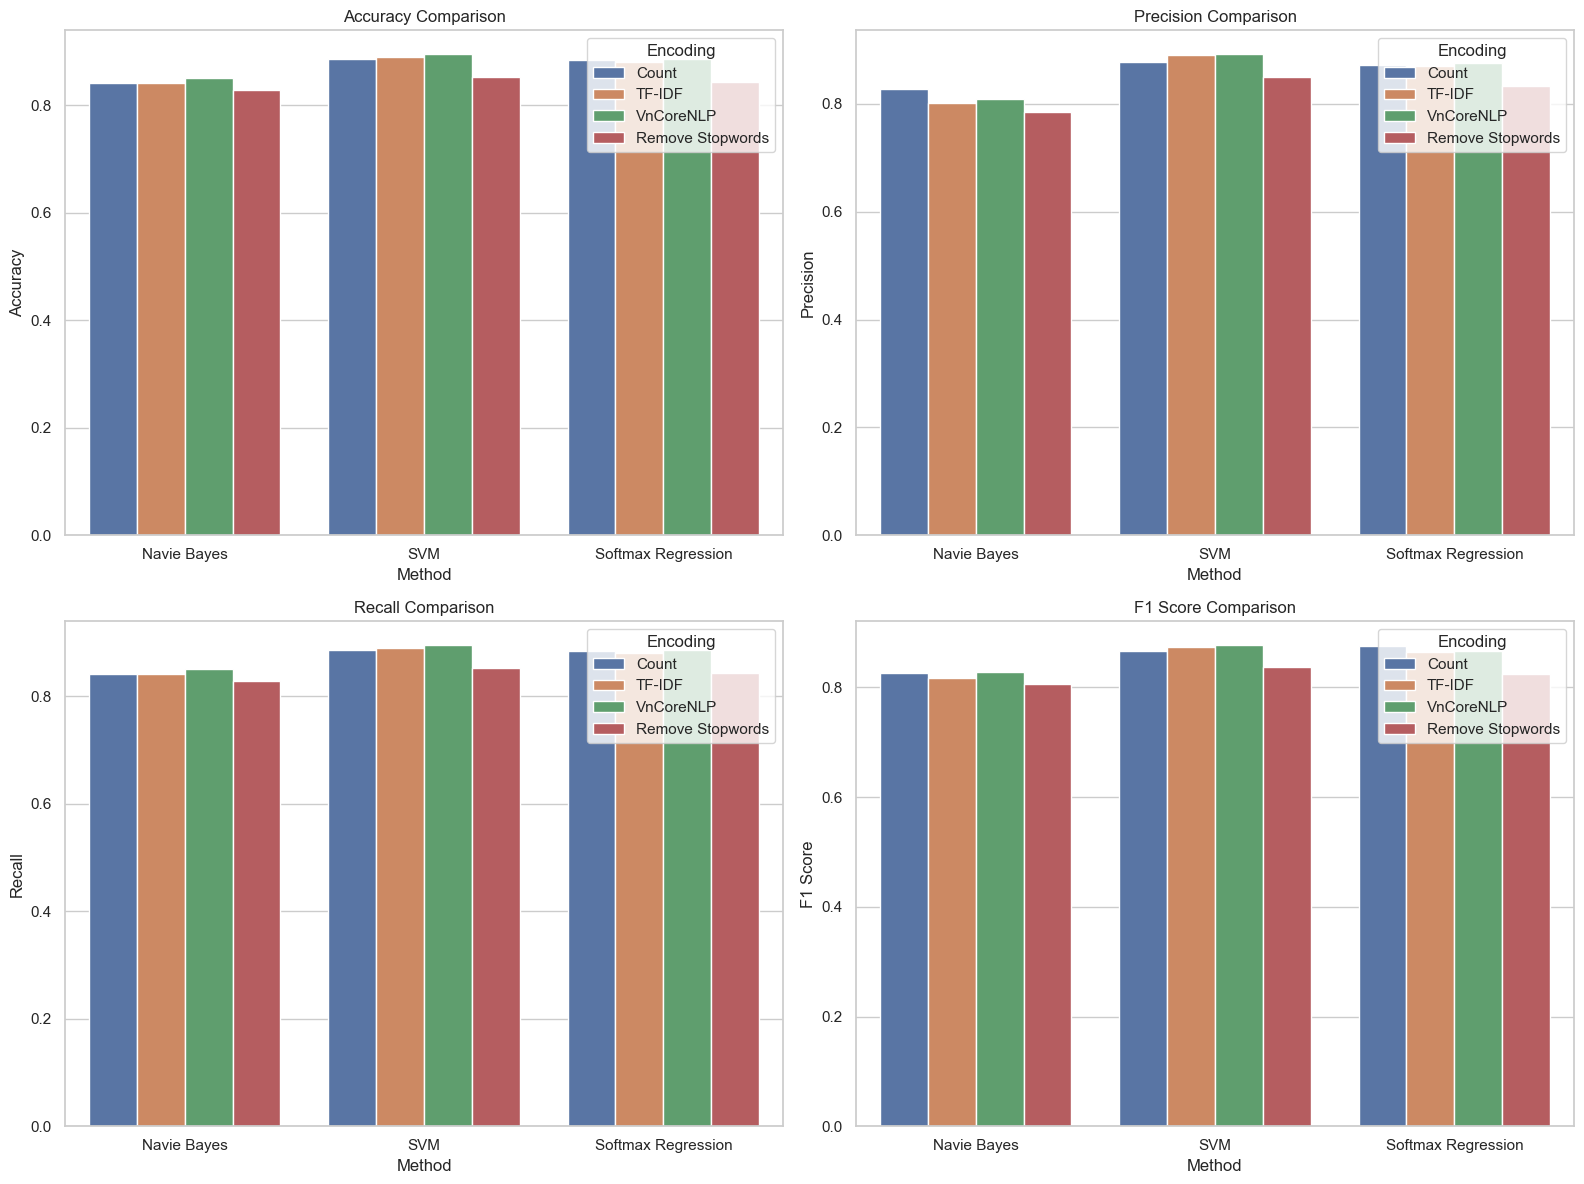

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Kết quả của các phương pháp mã hóa
results = {
    'Method': ['Navie Bayes', 'SVM', 'Softmax Regression',
                'Navie Bayes', 'SVM', 'Softmax Regression',
                'Navie Bayes', 'SVM', 'Softmax Regression', 
                'Navie Bayes', 'SVM', 'Softmax Regression'],

    'Encoding': ['Count', 'Count', 'Count',
                'TF-IDF', 'TF-IDF', 'TF-IDF',
                'VnCoreNLP', 'VnCoreNLP', 'VnCoreNLP', 
                'Remove Stopwords', 'Remove Stopwords', 'Remove Stopwords'],
    'Accuracy': accuracys,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1s
}

# Tạo DataFrame từ kết quả
df = pd.DataFrame(results)

# Thiết lập kiểu hiển thị của seaborn
sns.set(style="whitegrid")

# Thiết lập biểu đồ
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Vẽ biểu đồ Accuracy
sns.barplot(x='Method', y='Accuracy', hue='Encoding', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Accuracy Comparison')

# Vẽ biểu đồ Precision
sns.barplot(x='Method', y='Precision', hue='Encoding', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Precision Comparison')

# Vẽ biểu đồ Recall
sns.barplot(x='Method', y='Recall', hue='Encoding', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Recall Comparison')

# Vẽ biểu đồ F1 Score
sns.barplot(x='Method', y='F1 Score', hue='Encoding', data=df, ax=axes[1, 1])
axes[1, 1].set_title('F1 Score Comparison')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


**Nhận xét**: ta nhận thấy mô hình SVM cho kết quả tương đối tốt hơn so với 2 mô hình khác ở cả 4 độ đo. Theo sau nó lần lượt là Softmax Regression và Naive Bayes. Và phương pháp emcoding remove stopwords cho ra kết quả đánh giá thấp hơn các phương pháp encoding khác ở cả 4 chỉ số. Điều này có thể là do khi remove stopwords, một số từ có thể là stop word ở ngữ cảnh này lại có vai trò quan trọng trong phân loại đối với ngữ cảnh khác. 

Vd: câu 'thời_lượng học quá dài , không đảm_bảo tiếp_thu hiệu_quả .' sau khi xử lý sẽ trở thành 'thời_lượng học quá dài , đảm_bảo tiếp_thu hiệu_quả .', từ không trong ngữ cảnh này có ý nghĩa phân loại vô cùng quan trọng như lại bị coi là stopwords và bị loại bỏ. 

* Về chỉ số accurancy: 
    - Naive Bayes và SVM: phương pháp mã hóa TF-IDF kết hợp với tách từ bằng VNCoreNLP cho kết quả cao nhất, theo sau lần lượt là TF-IDF, counting và remove stopwords. 
    - Softmax Regression: thứ tự có chút khác biệt, mã hóa TF-IDF kết hợp với tách từ bằng VNCoreNLP tiếp tục cho kết quả cao nhất, theo sau lần lượt là counting, TF-IDF và remove stopwords. 

* Về chỉ số precision: 
    - SVM và Softmax Regression: phương pháp mã hóa TF-IDF kết hợp với tách từ bằng VNCoreNLP cho kết quả cao nhất, theo sau lần lượt là TF-IDF, counting và remove stopwords. 
    - Naive Bayes: thứ tự có chút khác biệt, mã hóa counting cao nhất, theo sau lần lượt là TF-IDF kết hợp với tách từ bằng VNCoreNLP, TF-IDF và remove stopwords. 

* Về chỉ số recall: 
    - Naive Bayes và SVM: phương pháp mã hóa TF-IDF kết hợp với tách từ bằng VNCoreNLP cho kết quả cao nhất, theo sau lần lượt là TF-IDF, counting và remove stopwords. 
    - Softmax Regression: thứ tự có chút khác biệt, mã hóa TF-IDF kết hợp với tách từ bằng VNCoreNLP tiếp tục cho kết quả cao nhất, theo sau lần lượt là counting, TF-IDF và remove stopwords. 

* Về chỉ số f1-score: 
    - SVM: phương pháp mã hóa TF-IDF kết hợp với tách từ bằng VNCoreNLP cho kết quả cao nhất, theo sau lần lượt là TF-IDF, counting và remove stopwords. 
    - Naive Bayes: thứ tự có chút khác biệt, mã hóa counting cao nhất, theo sau lần lượt là TF-IDF kết hợp với tách từ bằng VNCoreNLP, TF-IDF và remove stopwords. 
    - Softmax Regression: thứ tự lần lượt là mã hóa counting cho kết quả cao nhất, theo sau lần lượt là TF-IDF kết hợp với tách từ bằng VNCoreNLP, TF-IDF và remove stopwords. 

Sau khi phân tích chi tiết từng chỉ số đánh giá, ta còn nhận ra được một xu hướng chung nữa đó là khi áp dụng thêm VNCoreNLP vào TF-IDF, kết quả đánh giá cho ra đều tốt hơn chỉ dùng TF-IDF ở mọi mô hình và chỉ số đánh giá. Điều này càng chứng minh hiệu quả rõ rệt của phương pháp này. Nhìn chung thì phương pháp kết hợp giữa VNCoreNLP và TF-IDF Vectorizer cho kết quả tốt nhất trên mọi chỉ số đánh giá và mô hình huấn luyện. 